In [49]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Estimation of $P_{nd_n}(V_{nt})$
We will start by estimation conditional probability of agent $n$ choosing 
sequence of choices $ d_n = (d_{n1}, \dots, d_{nT}) \in \{-1, 1\}^{T}$. 
Agent choose $d_n$ if 
$$d_{nt}U_{nt} = d_{nt}(\beta'_{n}x_{nt} +\eta_n + \varepsilon_{nt}) = d_{nt}(V_{nt} +\eta_n + \varepsilon_{nt})  > 0 \quad \forall t
$$
Since we will assume taste variation, it means that $\beta_n$ is random. For 
simplicity lets estimate conditional probability of agent $n$ choosing
sequence of action $d_{n}$ given both $\beta_n$ and $\eta_n$

We will estimate the following:
$$P_{nd_n}(V_{nt}) = \int_{\mathbb{R}}  \underbrace{\prod_{t=1}^{T}\Phi((V_{nt} + \eta_n)d_{nt})}_{H_{nd_n}(V_{nt}, \eta_n)} \phi(\eta_n)d\eta_n$$
using trains procedure:


1. Take a draw from a normal density with zero mean and $ \sigma $ variance.
2. For this draw of $ \eta_n $, calculate $ H_{nd_n}(\eta_n) $ .
3. Repeat steps 1–2 many times, and average the results.
      This average is a simulated approximation to $ P_{nd_n} $ .



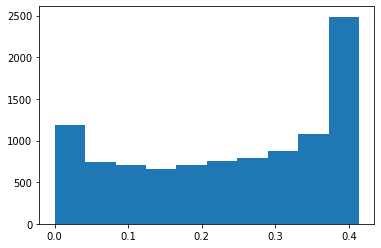

In [50]:
def H(eta, V_n, d_n):
    return np.prod(norm.cdf((V_n + eta) * d_n), axis=1)


# we will fix amount of periods for each agent `n`
T = 5
# sigma will be estimated with SMLE
sigma = 1
# V_n is a combination of betas, which will
# be estimated from SMLE and fixed data
V_n = np.array([-1, 0, 1, 2, 3])
# d_n is from fixed data (y = 1 or y = 0)
d_n = np.array([-1, -1, 1, 1, 1])

# number of simulations to estimate integral
simulation_size = 10_000
# step 1
simulated_etas = np.random.normal(
    loc=0,
    scale=sigma,  # important
    size=(simulation_size, 1)
)
# stack simulated normal r.v to perform broadcasting
simulated_etas = np.repeat(simulated_etas, 5, axis=1)
# step 2. obtain distribution of function values
result = H(simulated_etas, V_n, d_n)

plt.hist(result);

### Simulation of $V_n$

Denote $V_n = (V_{n1}, \dots, V_{nT})$, where $ V_{nt} = \beta_n' x_{nt}$ and 
$$\beta_n \sim \mathcal{N}(\pmb{b}, \pmb{\Sigma})$$
and data is a vector of $n$'s agent attributes and choice characteristics:
$x_{nt} = (x_{nt1}, x_{nt2}, \dots, x_{ntk})'$

therefore $\beta_n=(\beta_{n1}, \beta_{n2}, \dots, \beta_{nk})$ - a random vector
and linear part of utility can be rewritten as:
$$
V_{nt} = \beta_n' x_{nt} = \sum_{i=1}^{k}\beta_{nk}x_{ntk}
$$
To incorporate taste variation in our model, we begin with constructing the
following conditional on $\beta_n$ probabiliy of choosing sequence $d_{n}$ of
choices:
$$
P_{nd_n}(\beta_{n}) = \int_{\mathbb{R}}  \underbrace{\prod_{t=1}^{T}\Phi((\beta_n'x_{nt} + \eta_n)d_{nt})}_{H_{nd_n}(\beta_n, \eta_n)} \phi_{\sigma}(\eta_n)d\eta_n
$$
where $\phi_{\sigma}(\eta_n)$ is normal pdf with variance $\sigma$.
Unconditional probability is then:
$$
\begin{align*}
P_{nd_n} = \int_{\mathbb{R^k}} P_{nd_n}(\beta_{n}) \phi_{\Sigma}(\beta_{n})d\beta_{n} &=
\int_{\mathbb{R^k}}\left(\int_{\mathbb{R}} H_{nd_n}(\beta_n, \eta_n)\phi_{\sigma}(\eta_n)d\eta_n \right) \phi_{\Sigma}(\beta_{n})d\beta_{n} \\
&=\int_{\mathbb{R^k}}\left(\int_{\mathbb{R}}  \underbrace{\prod_{t=1}^{T}\Phi((\beta_n'x_{nt} + \eta_n)d_{nt})}_{H_{nd_n}(\eta_n)} \phi_{\sigma}(\eta_n)d\eta_n \right)\phi_{\Sigma}(\beta_{n})d\beta_{n}
\end{align*}
$$
where $\phi_{\Sigma}(\beta_n)$ is joint normal pdf with covariance matrix $\Sigma$

So estimation algorithm will be the following:
1. Initialize values of $\sigma$, $\Sigma$, b with random values
2. Use values from previos point to draw $N = 10000$ samples from $\phi_{\Sigma}(\beta_n)$ 
3. For each sample $k$ in $N$ draw $N_k = 10000$ samples from $\phi_{\sigma}(\eta_n)$
4. For each sample $k$ simulate $\bar{P}_{nd_n} (\beta_n)$ 
5. Average across $k$ to obtain $\hat{P}_{nd_n} (\beta_n)$ 
6. For each sample $n$ simulate unconditional $\bar{P}_{nd_n}$, using 
data from previous point.
7. Average across $n$

todo: repeat for all agents
update params with SMLE and repeat again




